In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
print('Hello! I want to draw functions of CTEQ6')

Hello! I want to draw functions of CTEQ6


The coefficients for the nonperturbative PDF is at Q_0 = 1.3GeV


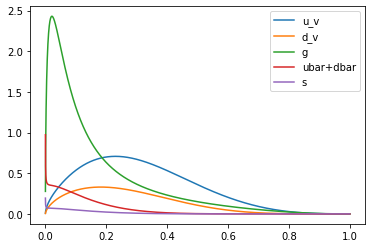

In [2]:
#number from paper
def CTEQ6_PDF(parameters):
    x_axis = np.arange(0.0001,0.9999,0.0001)
    return parameters[0]*x_axis**parameters[1]*(1-x)**parameters[2]\
    *np.exp(parameters[3]*x_axis)*(1+np.exp(parameters[4])*x)**parameters[5]
parameters_u_v = [1.7199,0.5526,2.9009,-2.3402,1.6123,1.5917]
x = np.arange(0.0001,0.9999,0.0001)
print('The coefficients for the nonperturbative PDF is at Q_0 = 1.3GeV')
y_u_v = CTEQ6_PDF(parameters_u_v)
plt.plot(x,y_u_v,label="u_v")
parameters_d_v = [1.4473,0.6160,4.9670,-0.8408,0.4031,3]
y_d_v = CTEQ6_PDF(parameters_d_v)
plt.plot(x,y_d_v,label="d_v")
parameters_g = [30.4571,0.51,2.3823,4.3945,2.355,-3]
y_g = CTEQ6_PDF(parameters_g)
plt.plot(x,y_g,label="g")
parameters_ubardbar = [0.0616,-0.299,7.717,-0.5283,4.7539,0.6137]
y_dbarplusubar = CTEQ6_PDF(parameters_ubardbar)
plt.plot(x,y_dbarplusubar,label="ubar+dbar")
parameters_s = [0.0123,-0.299,7.717,-0.5283,4.7539,0.6137]
y_s = CTEQ6_PDF(parameters_s)
plt.plot(x,y_s,label='s')
plt.legend()

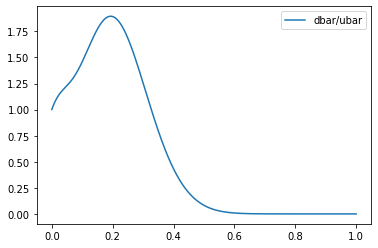

In [3]:
def CTEQ6_dbar_over_ubar(parameters):
    x_axis = np.arange(0.0001,0.9999,0.0001)
    return parameters[0]*x_axis**parameters[1]*(1-x_axis)**parameters[2]+(1+parameters[3]*x)*(1-x_axis)**parameters[4]
parameters_ratio = [33657.8,4.2767,14.8586,17,8.6408]
y_dbaroverubar = CTEQ6_dbar_over_ubar(parameters_ratio)
plt.plot(x,y_dbaroverubar,label='dbar/ubar')
plt.legend()

In [4]:
A = np.asarray(y_dbarplusubar)
B = np.asarray(y_dbaroverubar)

y_ubar = A/(1+B)
y_dbar = y_ubar*B

The ccoefficients for the nonperturbative PDF is at Q_0 = 1.3GeV


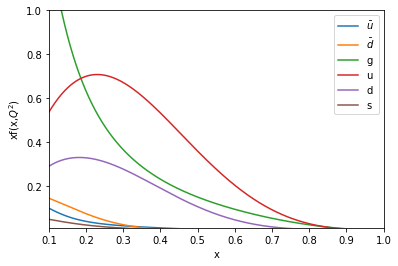

In [5]:
print('The ccoefficients for the nonperturbative PDF is at Q_0 = 1.3GeV')
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x,y_ubar,label=r"$\bar u$")
plt.plot(x,y_dbar,label=r"$\bar d$")
plt.plot(x,y_g,label="g")
plt.plot(x,y_u_v,label="u")
plt.plot(x,y_d_v,label="d")
plt.plot(x,y_s,label="s")
#ax.set_yscale("log")
#ax.set_xscale("log")
plt.ylim(1e-2,1e0)
plt.xlim(1e-1,1e0)
plt.xlabel("x")
plt.ylabel(r"xf(x,$Q^2$)")
plt.legend()
plt.savefig('cteqPDFs.png')

In [6]:
print('The ccoefficients for the nonperturbative PDF is at Q_0 = 1.3GeV log(Q^2)PDGctex subroutine')
print("  A_0  A_1 A_2 A_3 A_4 A_5")
print("d_v      ",parameters_d_v)
print("u_v      ",parameters_u_v)
print("g        ",parameters_g)
print("ubar_dbar", parameters_ubardbar)
print("s        ", parameters_s)
print("dbar/ubar",parameters_ratio)

The ccoefficients for the nonperturbative PDF is at Q_0 = 1.3GeV log(Q^2)PDGctex subroutine
  A_0  A_1 A_2 A_3 A_4 A_5
d_v       [1.4473, 0.616, 4.967, -0.8408, 0.4031, 3]
u_v       [1.7199, 0.5526, 2.9009, -2.3402, 1.6123, 1.5917]
g         [30.4571, 0.51, 2.3823, 4.3945, 2.355, -3]
ubar_dbar [0.0616, -0.299, 7.717, -0.5283, 4.7539, 0.6137]
s         [0.0123, -0.299, 7.717, -0.5283, 4.7539, 0.6137]
dbar/ubar [33657.8, 4.2767, 14.8586, 17, 8.6408]


LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
Q2 is cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
 4
Q2 is  4.75
Q2 is  5.5


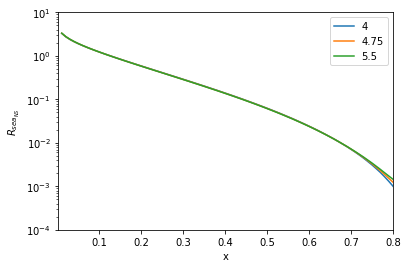

In [7]:
import lhapdf
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
Q2s = [4,4.75,5.5]
for i in range(len(Q2s)):
    Q2 = Q2s[i]
    Q=math.sqrt(Q2)
    print("Q2 is ",Q2)
    x_axis = np.arange(0.01,0.99,0.01)
    y_dv=[]
    y_uv=[]
    y_dbar=[]
    y_ubar=[]
    for x in np.arange(0.01,0.99,0.01):
        y_dv.append(p_cteq6.xfxQ(1,x,Q))
        y_uv.append(p_cteq6.xfxQ(2,x,Q))
        y_dbar.append(p_cteq6.xfxQ(-1,x,Q))
        y_ubar.append(p_cteq6.xfxQ(-2,x,Q))
    u_bar=np.asarray(y_ubar)
    d_bar=np.asarray(y_dbar)
    u_v=np.asarray(y_uv)
    d_v=np.asarray(y_dv)
    R_sea_NS=5*(u_bar+d_bar)/(u_v+d_v)
    Bxz=R_sea_NS
    #fig = plt.figure()
    #ax = fig.add_subplot()
    plt.plot(x_axis,Bxz,label=Q2)
    plt.yscale('log')
    #ax.set_yscale("log")
    plt.ylim(1e-4,1e1)
    plt.xlim(0.001,0.8)
    plt.xlabel("x")
    plt.ylabel(r"$R_{sea_{NS}}$")
    plt.legend()

Q2 is  4
Q2 is  4.75
Q2 is  5.5


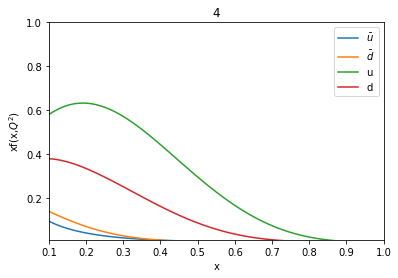

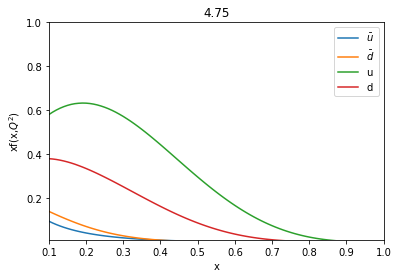

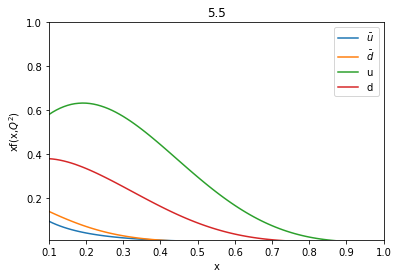

In [8]:
for i in range(len(Q2s)):
    Q2 = Q2s[i]
    Q=math.sqrt(Q2)
    print("Q2 is ",Q2)
    fig = plt.figure()
    ax = fig.add_subplot()
    plt.plot(x_axis,y_ubar,label=r"$\bar u$")
    plt.plot(x_axis,y_dbar,label=r"$\bar d$")
    #plt.plot(x_axis,y_g,label="g")
    plt.plot(x_axis,y_uv,label="u")
    plt.plot(x_axis,y_dv,label="d")
    #plt.plot(x_axis,y_s,label="s")
    #ax.set_yscale("log")
    #ax.set_xscale("log")
    plt.ylim(1e-2,1e0)
    plt.xlim(1e-1,1e0)
    plt.xlabel("x")
    plt.ylabel(r"xf(x,$Q^2$)")
    ax.set_title(Q2)
    plt.legend()

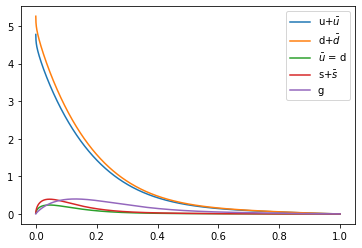

In [9]:
def Frag_D(parameters):
    z = np.arange(0.0001,0.9999,0.0001)
    return parameters[0]*z**parameters[1]*(1-z)**parameters[2]*(1+parameters[3]*(1-z)**parameters[4])
parameters_uPlusubar = [0.345,-0.015,1.2,11.06,4.23]
z_axis = np.arange(0.0001,0.9999,0.0001)
D_uPlusubar = Frag_D(parameters_uPlusubar)
plt.plot(z_axis,D_uPlusubar,label=r'u+$\bar u$')
parameters_dPlusdbar = [0.380,-0.015,1.2,11.06,4.23]
D_dPlusdbar = Frag_D(parameters_dPlusdbar)
plt.plot(z_axis,D_dPlusdbar,label=r'd+$\bar d$')
parameters_ubarEqvd = [0.115,0.520,3.27,16.26,8.46]
D_ubarEqvd = Frag_D(parameters_ubarEqvd)
plt.plot(z_axis,D_ubarEqvd,label=r'$\bar u$ = d')
parameters_sPlussbar = [0.190,0.520,3.27,16.26,8.46]
D_sPlussbar = Frag_D(parameters_sPlussbar)
plt.plot(z_axis,D_sPlussbar,label=r's+$\bar s$')
#parameters_cPluscbar = [0.271,-0.905,3.23,0,0]
#D_cPluscbar = Frag_D(parameters_cPluscbar)
#plt.plot(z_axis,D_cPluscbar,label=r'c+$\bar c$')
#parameters_bPlusbbar = [0.501,-1.305,5.67,0,0]
#D_bPlusbbar = Frag_D(parameters_bPlusbbar)
#plt.plot(z_axis,D_bPlusbbar,label=r'b+$\bar b$')
parameters_g = [0.279,0.899,1.57,20,4.91]
D_g = Frag_D(parameters_g)
plt.plot(z_axis,D_g,label='g')
plt.legend()

This is CSV function delta u_v / delta d_v
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042


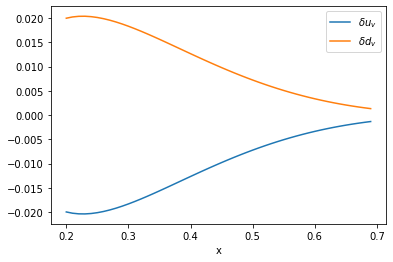

In [10]:
#use lhapdf 
import lhapdf
print('This is CSV function delta u_v / delta d_v')
def delta_udv(parameter):
    x = np.arange(0.2,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
def Ax(xbj,Q):
    return -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))


x_axis = np.arange(0.2,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
plt.plot(x_axis,y_delta_uv,label=r'$\delta u_v$')
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv,label=r'$\delta d_v$')

plt.xlabel("x")
plt.legend()

Text(0, 0.5, '$\\delta d - \\delta u$')

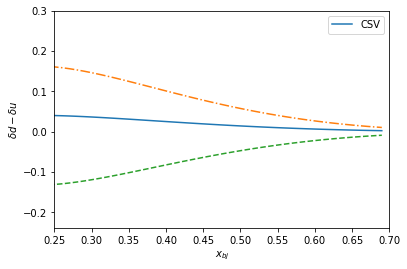

In [11]:
plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'CSV')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.legend()
plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

Text(0, 0.5, '$A(x)*CSV$')

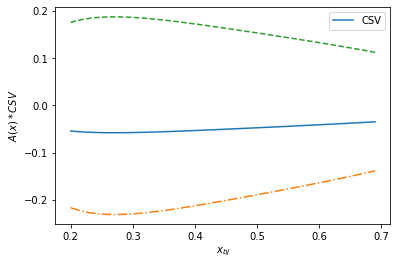

In [12]:
Ax_1 = []
for i in x_axis:
    Ax_1.append(Ax(i,2))
#plt.plot(x_axis,Ax_1)
plt.plot(x_axis,Ax_1*(y_delta_dv-y_delta_uv),label = 'CSV')
plt.plot(x_axis,Ax_1*(y_delta_uv_up-y_delta_uv_low),'-.')
plt.plot(x_axis,Ax_1*(y_delta_dv_up-y_delta_dv_low),'--')
plt.legend()
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$A(x)*CSV$")


In [13]:
import sys
sys.path.insert(1,'DSS')
import fDSS_

In [14]:
fDSS_.fdss(1,-1,0,0.5,5)

array([ 8.59332595e-02,  2.29340147e-01,  2.56035561e-01,  8.58832595e-02,
        7.58130754e-02,  7.58130754e-02,  6.17155984e-02, -8.42293556e-19,
        5.26047325e-01])

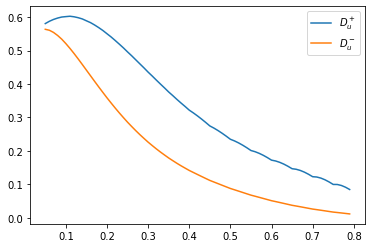

In [15]:
zs = np.arange(0.05,0.8,0.01)
Duplus = []
Duminus = []
for zi in zs:
    Duplus.append(fDSS_.fdss(1,1,0,zi,4.0)[0])
    Duminus.append(fDSS_.fdss(1,-1,0,zi,4.0)[0])
plt.plot(zs,Duplus,label = r'$D_u^+$') 
plt.plot(zs,Duminus,label = r'$D_u^-$')
plt.legend()

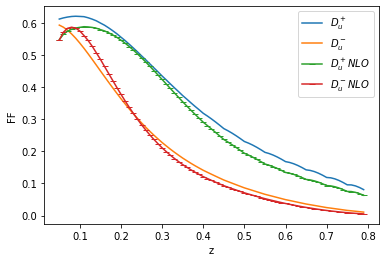

In [16]:
Duplus = []
Duminus = []
Duplus_nlo = []
Duminus_nlo = []
DSS_LO = []
DSS_NLO = []
for zi in zs:
    Duplus.append(fDSS_.fdss(1,1,0,zi,4.75)[0])
    Duminus.append(fDSS_.fdss(1,-1,0,zi,4.75)[0])
    Duplus_nlo.append(fDSS_.fdss(1,1,1,zi,4.75)[0])
    Duminus_nlo.append(fDSS_.fdss(1,-1,1,zi,4.75)[0])
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,4.75)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,4.75)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])


plt.plot(zs,Duplus,label = r'$D_u^+$') 
plt.plot(zs,Duminus,label = r'$D_u^-$')
plt.plot(zs,Duplus_nlo,label = r'$D_u^+ NLO$',marker = "_")
plt.plot(zs,Duminus_nlo,label = r'$D_u^- NLO$',marker = "_")
plt.xlabel('z')
plt.ylabel('FF')
plt.legend()

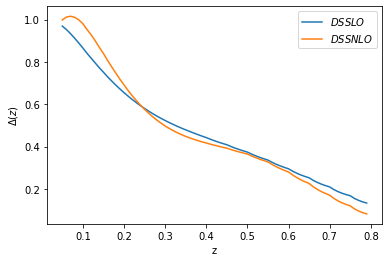

In [17]:
plt.plot(zs,DSS_LO,label = r'$DSS LO$')
plt.plot(zs,DSS_NLO,label = r'$DSS NLO$')
plt.xlabel('z')
plt.ylabel(r'$\Delta(z)$')
plt.legend()

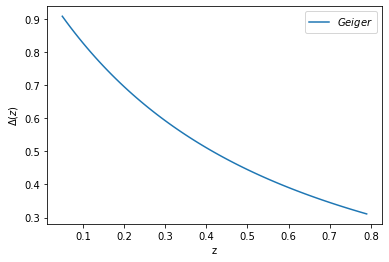

In [18]:
Geiger_Delta = []
for z_had in zs:
    Geiger_Delta.append((1.0-z_had)**0.0083583/(1.0+z_had)**1.9838)
plt.plot(zs,Geiger_Delta,label = r'$Geiger$')
plt.xlabel('z')
plt.ylabel(r'$\Delta(z)$')
plt.legend()

In [19]:
JAM21 = lhapdf.mkPDF("JAM21PionPDFnlo", 0)
#set_JAM21 = lhapdf.getPDFSet("JAM21PionPDFnlo")
#JAM21 = set_JAM21.mkPDFs()

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM21PionPDFnlo/JAM21PionPDFnlo_0000.dat
JAM21PionPDFnlo PDF set, member #0, version 1


In [20]:
print(JAM21.xfxQ(2,0.24,2))##what does it mean??

0.05782535210760307


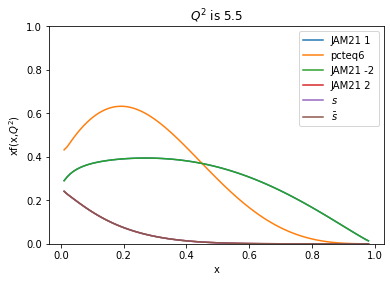

In [21]:
x_axis = np.arange(0.01,0.99,0.01)
y_dv=[]
y_uv=[]
y_dbar=[]
y_ubar=[]
y_g = []
y_s = []
y_sbar = []
for x in np.arange(0.01,0.99,0.01):
    y_dv.append(JAM21.xfxQ(1,x,Q))
    y_uv.append(p_cteq6.xfxQ(2,x,Q))
    #y_dbar.append(JAM21.xfxQ(-1,x,Q))
    y_dbar.append(JAM21.xfxQ(-2,x,Q))
    #y_dbar.append(JAM21.xfxQ(-1,x,Q))
    y_ubar.append(JAM21.xfxQ(2,x,Q))
    y_g.append(JAM21.xfxQ(0,x,Q))
    y_s.append(JAM21.xfxQ(3,x,Q))
    y_sbar.append(JAM21.xfxQ(-3,x,Q))
    
#y_uv[0] = 0    
plt.plot(x_axis,y_dv,label=r"JAM21 1")
plt.plot(x_axis,y_uv,label=r"pcteq6")
#plt.plot(x_axis,y_1,label=r"$g$")
plt.plot(x_axis,y_dbar,label=r"JAM21 -2")
plt.plot(x_axis,y_ubar,label=r"JAM21 2")
plt.plot(x_axis,y_s,label = r"$s$")
plt.plot(x_axis,y_sbar,label = r"$\bar s$")
plt.xlabel("x")
plt.ylabel(r"xf(x,$Q^2$)")
Q2_str = str(Q*Q)
plt.title(r"$Q^2$ is "+Q2_str[0:5])
plt.legend()
plt.ylim(0,1)
plt.xlabel('x')

plt.legend()

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


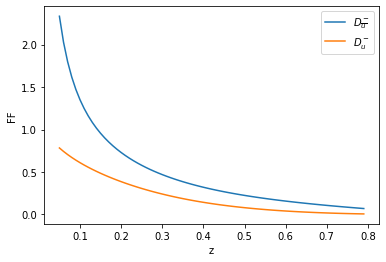

In [22]:
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Dum = []
JAM20_Dup = []
JAM20_Deltaz = []
for zi in zs:
    dup = JAM20.xfxQ(2,zi,2)
    dum = JAM20.xfxQ(-2,zi,2)
    #print(dup,' ',dum)
    JAM20_Dum.append(dum)
    JAM20_Dup.append(dup)
    JAM20_Deltaz.append(dum/dup)
plt.plot(zs,JAM20_Dup,label = r'$D^-_{\overline{u}}$')
plt.plot(zs,JAM20_Dum,label = r'$D^-_u$')

plt.xlabel('z')
plt.ylabel('FF')
plt.legend()

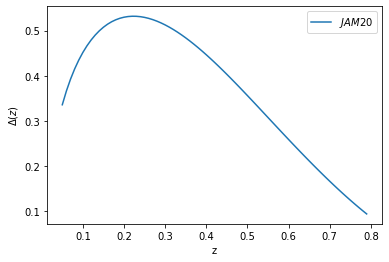

In [23]:
plt.plot(zs,JAM20_Deltaz,label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.legend()

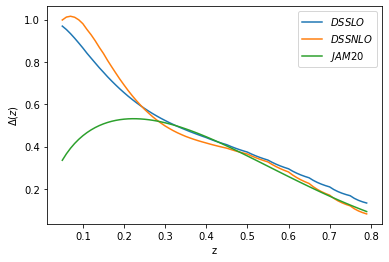

In [24]:
plt.plot(zs,DSS_LO,label = r'$DSS LO$')
plt.plot(zs,DSS_NLO,label = r'$DSS NLO$')
#plt.plot(zs,Geiger_Delta,label = r'$Geiger$')
#plt.plot(zs,JAM21_NLO_1,label = r'$JAM21nlo$')
plt.plot(zs,JAM20_Deltaz,label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.legend()

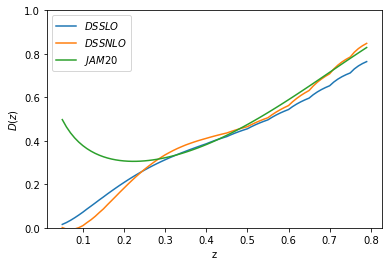

In [39]:
#DSS_LO
#DSS_NLO
#JAM20_Deltaz
plt.plot(zs,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),label = r'$DSS LO$')
plt.plot(zs,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),label = r'$DSS NLO$')
plt.plot(zs,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
#plt.xlim(0.1,0.9)
plt.ylim(0,1)
plt.legend()

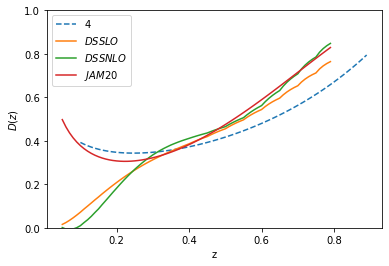

In [60]:
#parameter from my data, this needs to be updated everytime!
parameters = []
#4
parameters_0 = (0.31621375387783907,0.9655536623222454)
#parameters_0=(0.5837438039662431,-1.1844700435399933,1.6742194710533476)
#4.75
parameters_1=(0.5487693365000776,-1.0881946339773718,1.594995464377801)
#5.5
parameters_2=(0.38322380904636766,-0.47844410509432217,1.115729075281362)
def Dz(z_had, params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return (1-delta_z)/(1+delta_z)
z_had = np.arange(0.1,0.9,0.01)
#plt.plot(z_had,Dz(z_had,inits))
plt.plot(z_had,Dz(z_had,parameters_0),linestyle='dashed',label = '4')
#plt.plot(z_had,Dz(z_had,parameters_1),linestyle='dashed',label = '4.75')
#plt.plot(z_had,Dz(z_had,parameters_2),linestyle='dashed',label = '5.5')
plt.plot(zs,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),label = r'$DSS LO$')
plt.plot(zs,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),label = r'$DSS NLO$')
plt.plot(zs,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
#plt.xlim(0.1,0.9)
plt.ylim(0,1)
plt.legend()

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


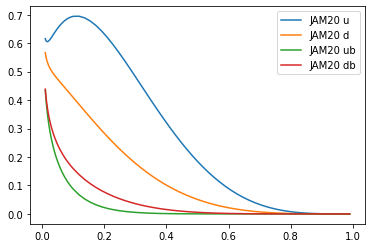

In [55]:
JAM20PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
Q = 10
x_axis=10**np.linspace(-2,-1)
x_axis=np.append(x_axis,np.linspace(0.101,0.99))
JAM20PDF_u = np.array([JAM20PDF.xfxQ(2,x,Q) for x in x_axis])
JAM20PDF_d = np.array([JAM20PDF.xfxQ(1,x,Q) for x in x_axis])
JAM20PDF_ub = np.array([JAM20PDF.xfxQ(-2,x,Q) for x in x_axis])
JAM20PDF_db = np.array([JAM20PDF.xfxQ(-1,x,Q) for x in x_axis])
plt.plot(x_axis,JAM20PDF_u,label = "JAM20 u")
plt.plot(x_axis,JAM20PDF_d,label = "JAM20 d")
plt.plot(x_axis,JAM20PDF_ub,label = "JAM20 ub")
plt.plot(x_axis,JAM20PDF_db,label = "JAM20 db")
plt.legend()
#u=np.array([[pdf[i].xfxQ2(2,x,Q2) for x in X] for i in range(nrep)])
#ub=np.array([[pdf[i].xfxQ2(-2,x,Q2) for x in X] for i in range(nrep)])

Text(0.5, 1.0, '10')

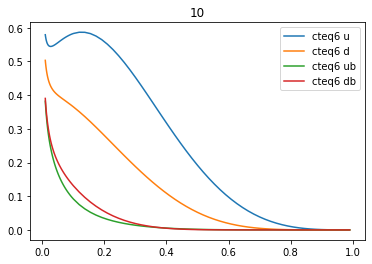

In [56]:
cteq6l1_u = np.array([p_cteq6.xfxQ(2,x,Q) for x in x_axis])
cteq6l1_d = np.array([p_cteq6.xfxQ(1,x,Q) for x in x_axis])
cteq6l1_ub = np.array([p_cteq6.xfxQ(-2,x,Q) for x in x_axis])
cteq6l1_db = np.array([p_cteq6.xfxQ(-1,x,Q) for x in x_axis])
plt.plot(x_axis,cteq6l1_u,label = "cteq6 u")
plt.plot(x_axis,cteq6l1_d,label = "cteq6 d")
plt.plot(x_axis,cteq6l1_ub,label = "cteq6 ub")
plt.plot(x_axis,cteq6l1_db,label = "cteq6 db")
plt.legend()
plt.title(Q)

Text(0.5, 1.0, '10')

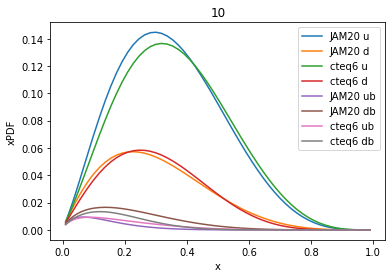

In [59]:
plt.plot(x_axis,x_axis*JAM20PDF_u,label = "JAM20 u")
plt.plot(x_axis,x_axis*JAM20PDF_d,label = "JAM20 d")
plt.plot(x_axis,x_axis*cteq6l1_u,label = "cteq6 u")
plt.plot(x_axis,x_axis*cteq6l1_d,label = "cteq6 d")
plt.plot(x_axis,x_axis*JAM20PDF_ub,label = "JAM20 ub")
plt.plot(x_axis,x_axis*JAM20PDF_db,label = "JAM20 db")
plt.plot(x_axis,x_axis*cteq6l1_ub,label = "cteq6 ub")
plt.plot(x_axis,x_axis*cteq6l1_db,label = "cteq6 db")
plt.xlabel('x')
plt.ylabel('xPDF')
plt.legend()
plt.title(Q)